In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from transform_factory import resize_322, center_crop_224
from captum.attr import visualization as viz
import torch

In [125]:
seed = 1
# expl_method = "LayerDL"
expl_method = "LayerXAct"
data_num = 11
dataset = "center_crop_224"
orig_input_method = "center_crop_224"

In [126]:
with open(f"./val_{dataset}_seed_{seed}.npy", "rb") as f:
    filepath_list = np.load(f)

for filepath in filepath_list[data_num:data_num+1]:
    print(filepath)
    img_name = os.path.basename(filepath)
    print(img_name)

    results_path = f"results/val_seed_{seed}_dataset_{dataset}_orig_input_method_{orig_input_method}_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_results.pkl"

    with open(results_path, "rb") as f:
        results = np.load(f, allow_pickle=True)

/home/juhyeon/Imagenet/val/n09193705/ILSVRC2012_val_00000081.JPEG
ILSVRC2012_val_00000081.JPEG


In [127]:
orig_expl = results[0]['orig_expl']

print(orig_expl.min(), orig_expl.max())

tensor(-0.0290) tensor(0.6926)


tensor(0.9502)


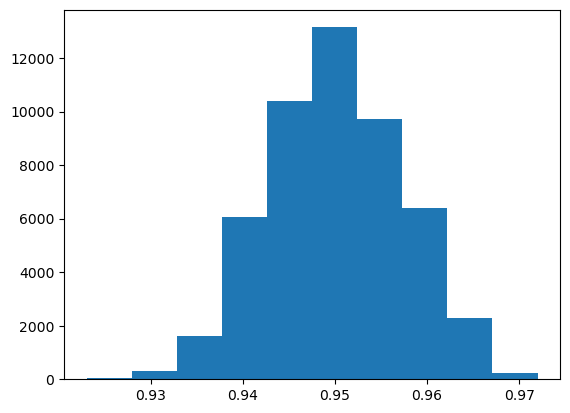

In [128]:
plt.hist(results[0]['coverage_prob'].flatten())
# plt.xlim(0, 1, 0.05)

print(results[0]['coverage_prob'].flatten().mean())

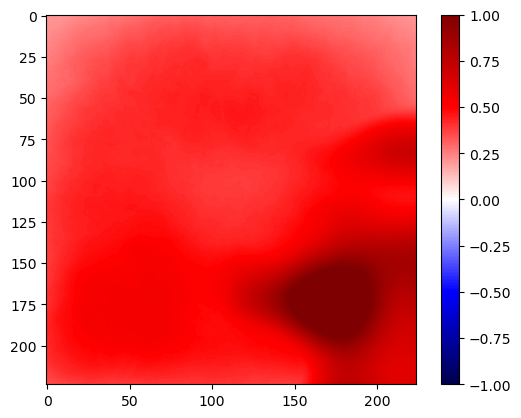

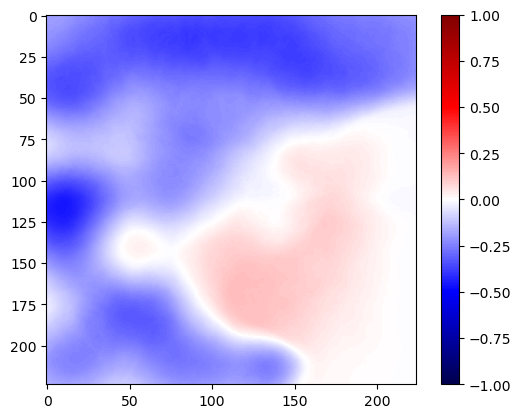

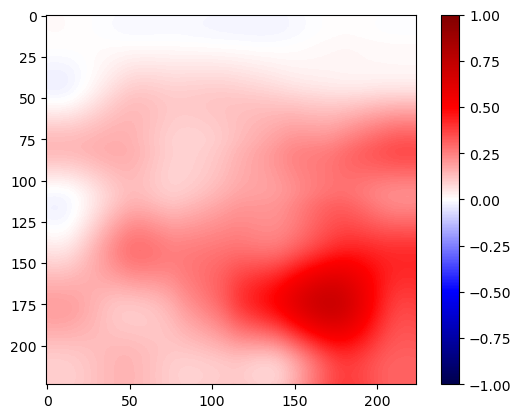

In [129]:
plt.imshow(results[0]['conf_high'].squeeze(), cmap="seismic")
plt.clim(-1, 1)
plt.colorbar()
plt.show()

plt.imshow(results[0]['conf_low'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()

plt.imshow(results[0]['orig_expl'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()


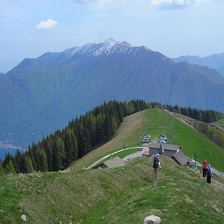

In [130]:
center_crop_224(resize_322(Image.open(filepath_list[data_num])))


In [131]:
conf_high = results[0]['conf_high'].squeeze()
conf_low = results[0]['conf_low'].squeeze()
orig_expl = results[0]['orig_expl']

print(224 * 224)
print(torch.where(torch.logical_and(orig_expl < 0, conf_high > 0))[0].shape)
print(torch.where(torch.logical_and(orig_expl < 0, conf_high < 0))[0].shape)

print(torch.where(torch.logical_and(orig_expl > 0, conf_low > 0))[0].shape)
print(torch.where(torch.logical_and(orig_expl > 0, conf_low < 0))[0].shape)



np_idx = torch.where(torch.logical_and(orig_expl < 0, conf_high > 0))



50176
torch.Size([3679])
torch.Size([0])
torch.Size([14465])
torch.Size([32032])


In [9]:
print(np_idx)

for r, c in zip(np_idx[0], np_idx[1]):
    print(orig_expl[r, c], conf_high[r, c])

(tensor([  0,   0,   0,  ..., 223, 223, 223]), tensor([ 0,  1,  2,  ..., 29, 30, 31]))
tensor(-0.0058) tensor(0.3337)
tensor(-0.0057) tensor(0.3389)
tensor(-0.0057) tensor(0.3475)
tensor(-0.0056) tensor(0.3529)
tensor(-0.0056) tensor(0.3580)
tensor(-0.0056) tensor(0.3637)
tensor(-0.0056) tensor(0.3655)
tensor(-0.0057) tensor(0.3712)
tensor(-0.0057) tensor(0.3704)
tensor(-0.0058) tensor(0.3780)
tensor(-0.0059) tensor(0.3766)
tensor(-0.0060) tensor(0.3793)
tensor(-0.0062) tensor(0.3861)
tensor(-0.0064) tensor(0.3940)
tensor(-0.0066) tensor(0.4023)
tensor(-0.0068) tensor(0.4088)
tensor(-0.0071) tensor(0.4171)
tensor(-0.0077) tensor(0.4226)
tensor(-0.0085) tensor(0.4293)
tensor(-0.0095) tensor(0.4389)
tensor(-0.0108) tensor(0.4405)
tensor(-0.0122) tensor(0.4429)
tensor(-0.0137) tensor(0.4470)
tensor(-0.0154) tensor(0.4485)
tensor(-0.0171) tensor(0.4516)
tensor(-0.0190) tensor(0.4545)
tensor(-0.0208) tensor(0.4568)
tensor(-0.0227) tensor(0.4584)
tensor(-0.0245) tensor(0.4595)
tensor(-0.0263